# LEAST-SQUARES

Given the following pairs of points
$$
(0,-1); \; (1,0.2); \; (2,0.9); \; (3,2.1);
$$

construct the best approximation line

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([0,1,2,3])
y = np.array([-1,0.2,0.9,2.1])

Text(0.5, 1.0, 'Given points')

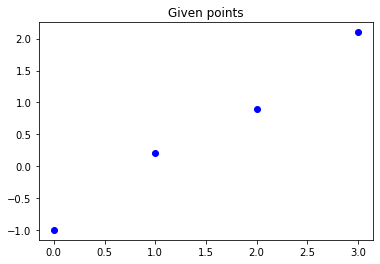

In [3]:
plt.plot(x,y,'ob')
plt.title('Given points')

Let us use the normal equations
$$
A^\top A a = A^\top b,
$$

where $A$ is the Vandermonde matrix,  $a$ is the unknown coefficient vector and  $b$ are the y-abscissas of the given points.

In [4]:
#Normal equation system
# A dimension is m x (n+1), in this case m = 4 and n is the degree = 1
n = 1
A = np.ones([len(x),n+1])

A[:,1] = x

In [5]:
print(A)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]]


In [6]:
# (A^T A)a = A^T b

M = np.dot(A.T,A)
tn =np.dot(A.T,y)

In [7]:
a = np.linalg.solve(M,tn)
print(a)

[-0.95  1.  ]


To construct a line, the numpy command ``polyval`` can be used. Remember that in this case the coefficients should be sorted from  $a_n$ to $a_0$ and hence, the vector $a$ should be sorted in reverse order.

In [8]:
#Generate 100 evaluation points
pts = np.linspace(-1,4,100)

Retta = np.polyval(np.flip(a), pts)

Text(0.5, 1.0, 'Best approximation line')

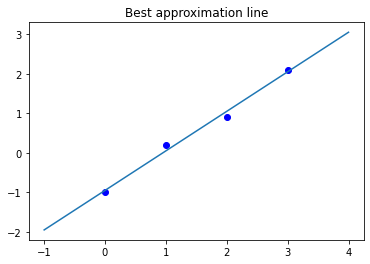

In [9]:
plt.plot(x,y,'ob', pts, Retta)
plt.title('Best approximation line')

Let us check the condition number of the used matrices

In [11]:
print("\n conditioning of A ", np.linalg.cond(A))
print("\n conditioning of A^T A ", np.linalg.cond(M))


 conditioning of A  3.7588860994071087

 conditioning of A^T A  14.129224708315995


# Exercises

1) Generate a sequence of random points affected by "normal" noise 

2) Construct a polynomial fitting with degree $n>1$.

3) Study the conditioning of the problem in the following cases:

 3.1 Normal equations and the command ``numpy.linalg.solve`` to solve the system;
 
 3.2 Normal equations and the LU factorization with partial pivoting to solve the system.

# Solution...

Regarding 1), we can choose the points and then add the "normal" noise

In [3]:
x = np.array([-1, -0.3, 1.4, 2, 2.2, 3.4, 3.7,4.2, 5, 5.5, 6, 6.1, 6.15])
y = np.array([1, 0.8, 3, 4, 5, 6, 7.5, 8.5, 9.85, 10, 12, 12.5, 13])

noise = np.random.normal(0,1,len(y))#normal noise, mean = 0 e std = 1

y_n = y + noise

Text(0.5, 1.0, 'Given points')

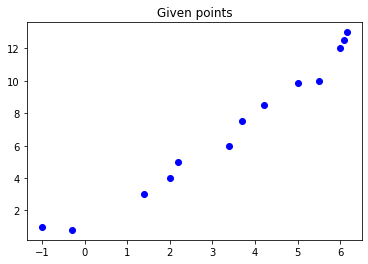

In [4]:
plt.plot(x,y,'ob')
plt.title('Given points')

In [5]:
# Let's construct the best approximation line:
# A^T A a = A^T b

A = np.ones([len(x),2])
A[:,1] = x

M = np.dot(A.T,A)
tn = np.dot(A.T,y)

aa = np.linalg.solve(M,tn)
print('\n unknwon coefficients for the line ', aa)


 unknwon coefficients for the line  [1.27373868 1.72697626]


Text(0.5, 1.0, 'Best approximation line')

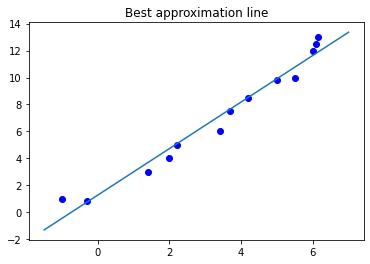

In [6]:
pts = np.linspace(-1.5,7,100)

Retta = np.polyval(np.flip(aa), pts)

plt.plot(x,y,'ob', pts, Retta)
plt.title('Best approximation line')

In [7]:
#We construct a quadratic fitting

A2 = np.ones([len(x),3])
A2[:,1] = x
A2[:,2] = x**2

M = np.dot(A2.T,A2)
tn = np.dot(A2.T,y)

aa2 = np.linalg.solve(M,tn)
print('\n unknwon coefficients for the quadratic fitting ', aa2)


 unknwon coefficients for the quadratic fitting  [1.56334968 1.04561096 0.11966574]


Text(0.5, 1.0, 'Quadratic fitting')

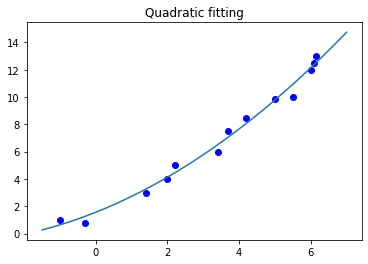

In [8]:
pts = np.linspace(-1.5,7,100)

Retta = np.polyval(np.flip(aa2), pts)

plt.plot(x,y,'ob', pts, Retta)
plt.title('Quadratic fitting')

# Exercise 4.4.6 from Meyer book

The text of the exercise says that the collected data follow the relation:
$$
y = \alpha_0 e^{\alpha_1 t}.
$$

In order to construct the best approximation line, we need to linearize the model. In particular we apply a logarithmic transformation to both sides and we carry on the computation:

$$
\ln(y) = \ln(\alpha_0 e^{\alpha_1 t})\\
      = \ln(\alpha_0) + \alpha_1 t
$$

Now we can rename the variables:
$$
\tilde{y}: = \ln(y)\\
\tilde{\alpha}:= \ln(\alpha_0),
$$
hence, the sought best approximation line equation becomes:
$$
\tilde{y} = \tilde{\alpha} + \alpha_1 t.
$$

Text(0.5, 1.0, 'Given points')

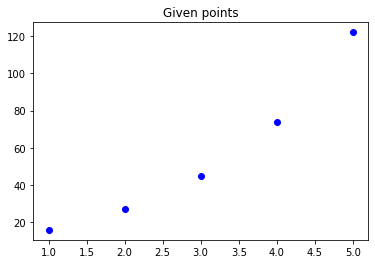

In [5]:
t = np.array([1,2,3,4,5])
yy = np.array([16,27,45,74,122])

plt.plot(t,yy,'ob')
plt.title('Given points')

Text(0.5, 1.0, 'Semilog-y plots of the points to highlight any linear relationship')

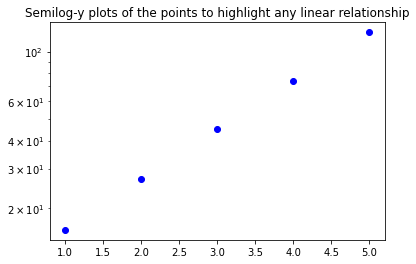

In [11]:
plt.semilogy(t,yy,'ob')
plt.title('Semilog-y plots of the points to highlight any linear relationship')

In [7]:
# 1) Linearize the model
# 2) Apply the normal equations

#1): y_tilde = alpha_tilde + alpha1 * t

A =np.ones([len(t),2])
A[:,1]= t

M = np.dot(A.T,A)
tn = np.dot(A.T,np.log(yy))

am = np.linalg.solve(M,tn)

print('\n best approximation line coeff ', am)



 best approximation line coeff  [2.27530698 0.50710929]


The coefficients just computed are:
$$
\tilde{\alpha} = am[0]\\
\alpha_1 = am[1].
$$
So, $\tilde{\alpha} \approx 2.275$ and $\alpha_1 = 0.507$. 

Text(0.5, 1.0, 'LinearFitting')

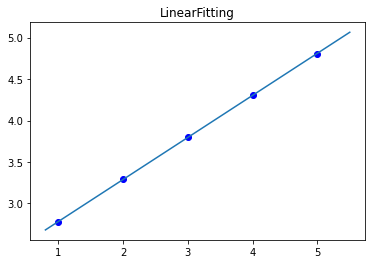

In [10]:
pts = np.linspace(0.8,5.5,100)

Retta = np.polyval(np.flip(am), pts)

plt.plot(t,np.log(yy),'ob')
plt.plot(pts, Retta)
plt.title('LinearFitting')

Obviously, from $\tilde{\alpha}$ we can recompute the value of $\alpha_0 = e^{\tilde{\alpha}}$

In [13]:
alpha_0 = np.exp(am[0])
print('\n alpha_0 value ', alpha_0)


 alpha_0 value  9.730905762479347
